# Basilico Nature Communication Paper
## Xiaonan Wang
## 04Feb2020

## Introduction

This is to reproduce the ATACseq figure (Fig2E) used in the Basilico nature communication paper.

### Samples
There are 12 samples in total with 3 replicates for each condition of:
1. d6 MLLENL
2. d6 Parental
3. d9 MLLENL
4. d9 Parental

### Peak calling 
Peaks were called using [Fseq](http://fureylab.web.unc.edu/software/fseq/). Peaks for each sample from 3 replicates were combined and merged using [bedtools](https://bedtools.readthedocs.io/en/latest/) and reads for each peak were counted using [HTSeq-count](https://htseq.readthedocs.io/en/release_0.11.1/count.html). The annotation for each peak was done using annoatePeaks.pl from [HOMER](http://homer.ucsd.edu/homer/download.html) package based on mm10 genome build.

### Analysis
The bglab R package can be downloaded from https://github.com/wjawaid/bglab. The saved R SCD objects included:
1. ATACSeq_scd.rds: 82658 peaks and 12 samples

The saved DESeq2 results included:
1. DEres_d6_MLLENLvsCtr.rds
2. DEres_d9_MLLENLvsCtr.rds

## Analysis

In [5]:
library(bglab);
library(DESeq2)

In [11]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 8 (jessie)

Matrix products: default
BLAS:   /home/USSR/xw251/programs/R-3.6.1/lib/R/lib/libRblas.so
LAPACK: /home/USSR/xw251/programs/R-3.6.1/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] DESeq2_1.26.0               SummarizedExperiment_1.16.1
 [3] DelayedArray_0.12.2         BiocParallel_1.20.1        
 [5] matrixStats_0.55.0          GenomicRanges_1.38.0       
 [7] GenomeInfoDb_1.22.0         IRang

In [6]:
#######################################################################
#### The code below should produce the SCD object required for further analysis
#######################################################################

# dir <- "./ATACSeq_data/ATACSeq_HTseqcount/"
# files <- list.files(dir)

# #### Read in count matrix generated from HTSeq-count
# cnt_table <- do.call("cbind",lapply(files, function(x){
#   read.table(paste(dir, x, sep=""), row.names=1)
# }))
# colnames(cnt_table) <- gsub("\\.txt", "", files)
# cnt_table1 <- cnt_table[grep("__", rownames(cnt_table), invert=TRUE),]

# #### Generate the metadata for samples
# Day <- gsub(".*_(.*\\d+)\\w.*", "\\1", colnames(cnt_table))
# Condition <- gsub(".*_.*\\d+(\\w+)\\d.*", "\\1", colnames(cnt_table))
# Condition[grep("wt", Condition)] <- "WT"
# Rep <- gsub(".*_.*(\\d).*", "\\1", colnames(cnt_table))
# colData <- data.frame(Day=as.factor(Day), Condition=as.factor(Condition), Replicate=as.factor(Rep))
# colData$C1 <- as.factor(paste(colData$Day, colData$Condition, sep="_"))
# rownames(colData) <- colnames(cnt_table1)
# colData$ID <- rownames(colData)

# #### Read in the peak annotation data
# anno <- read.delim("./ATACSeq_data/Cd48_all_merged_annotated.txt")
# anno$ID <- paste("peak_", anno$PeakID..cmd.annotatePeaks.pl.Cd48_all_merged.bed.mm10., sep="")
# rownames(anno) <- anno$ID

# geneT <- data.frame(ID=anno$ID, geneID = paste(anno$Gene.Name, anno$Annotation, sep="_"), Gene.Description=anno$Gene.Description, Gene.Type=anno$Gene.Type, Gene.Name=anno$Gene.Name)
# geneT$geneID <- gsub("\\(.*\\)", "", geneT$geneID) 

# #### Create bglab SCD object for analysis
# scd <- newSCD("RNAseq", genoData = geneT, phenoData = colData,
#                counts = as.matrix(cnt_table1), spike = NULL, qc = NULL)
# scd <- performQC(scd)

# #### Select for highly variable genes
# scd <- techVar(scd, useERCC = FALSE, fdr=0.3) 

scd <- readRDS('./ATACSeq_data/ATACSeq_scd.rds')

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“semi-transparency is not supported on this device: reported only once per page”


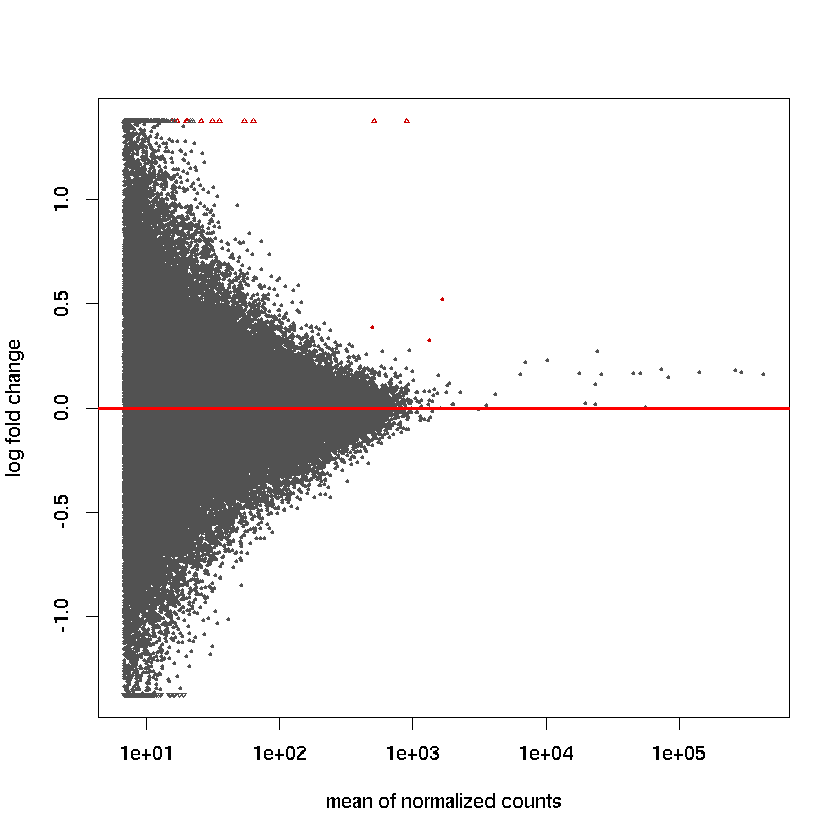

In [9]:
#### Perform DESeq2 analysis
## D6 MLLENL vs Parental
# g1 <- as.character(pData(scd)$ID)[pData(scd)$C1=="d6_MLLENL"]
# g2 <- as.character(pData(scd)$ID)[pData(scd)$C1=="d6_Ctr"]
# print(length(g1))
# print(length(g2))
# d6_MLLENLvsCtr <- doDESeq(scd, group1=g1, group2=g2, fdr=0.1)
# d6_MLLENLvsCtr$DESeq$GN <- geneID2Name(scd, rownames(d6_MLLENLvsCtr$DESeq))

d6_MLLENLvsCtr <- readRDS('./ATACSeq_data/DEres_d6_MLLENLvsCtr.rds')
plotMA(d6_MLLENLvsCtr$DESeq)
abline(h=0, col="red", lwd=2)

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“semi-transparency is not supported on this device: reported only once per page”


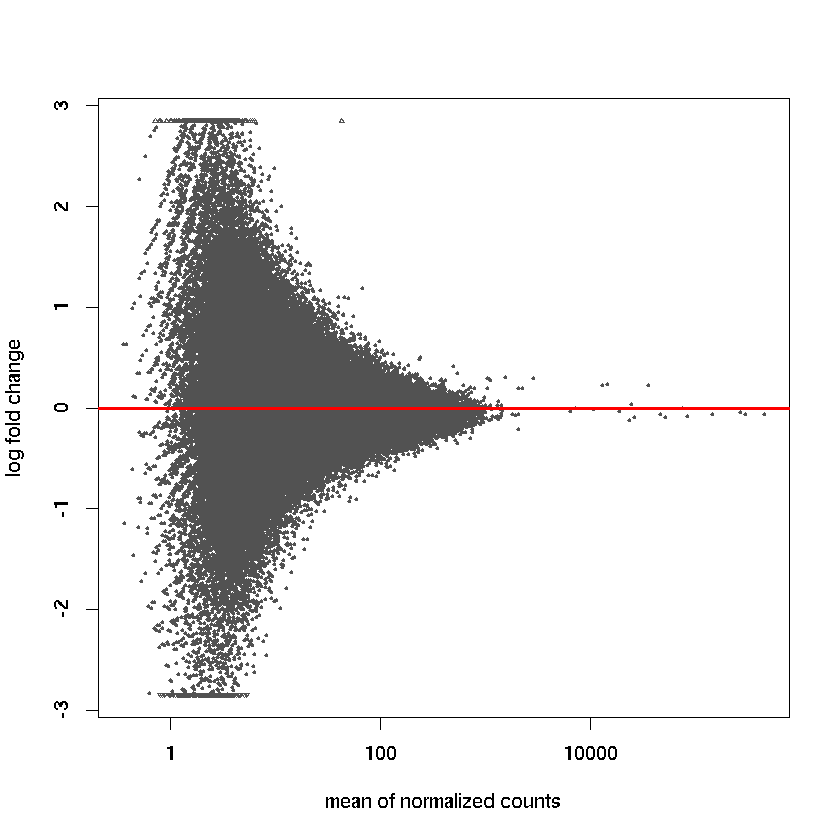

In [10]:
## D9 MLLENL vs Parental
# g1 <- as.character(pData(scd)$ID)[pData(scd)$C1=="d9_MLLENL"]
# g2 <- as.character(pData(scd)$ID)[pData(scd)$C1=="d9_Ctr"]
# print(length(g1))
# print(length(g2))
# d9_MLLENLvsCtr <- doDESeq(scd, group1=g1, group2=g2, fdr=0.1)
# d9_MLLENLvsCtr$DESeq$GN <- geneID2Name(scd, rownames(d9_MLLENLvsCtr$DESeq))

d9_MLLENLvsCtr <- readRDS('./ATACSeq_data/DEres_d9_MLLENLvsCtr.rds')
plotMA(d9_MLLENLvsCtr$DESeq)
abline(h=0, col="red", lwd=2)